In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data = pd.read_csv('drug200.csv')
data.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
data.nunique()

Age             57
Sex              2
BP               3
Cholesterol      2
Na_to_K        198
Drug             5
dtype: int64

In [5]:
print('Blood Pressue : ', data.BP.unique())
print('Cholesterol   : ', data.Cholesterol.unique())
print('Drugs         : ', data.Drug.unique())

Blood Pressue :  ['HIGH' 'LOW' 'NORMAL']
Cholesterol   :  ['HIGH' 'NORMAL']
Drugs         :  ['drugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [6]:
data.duplicated().sum()

0

In [7]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

<AxesSubplot:xlabel='Drug', ylabel='count'>

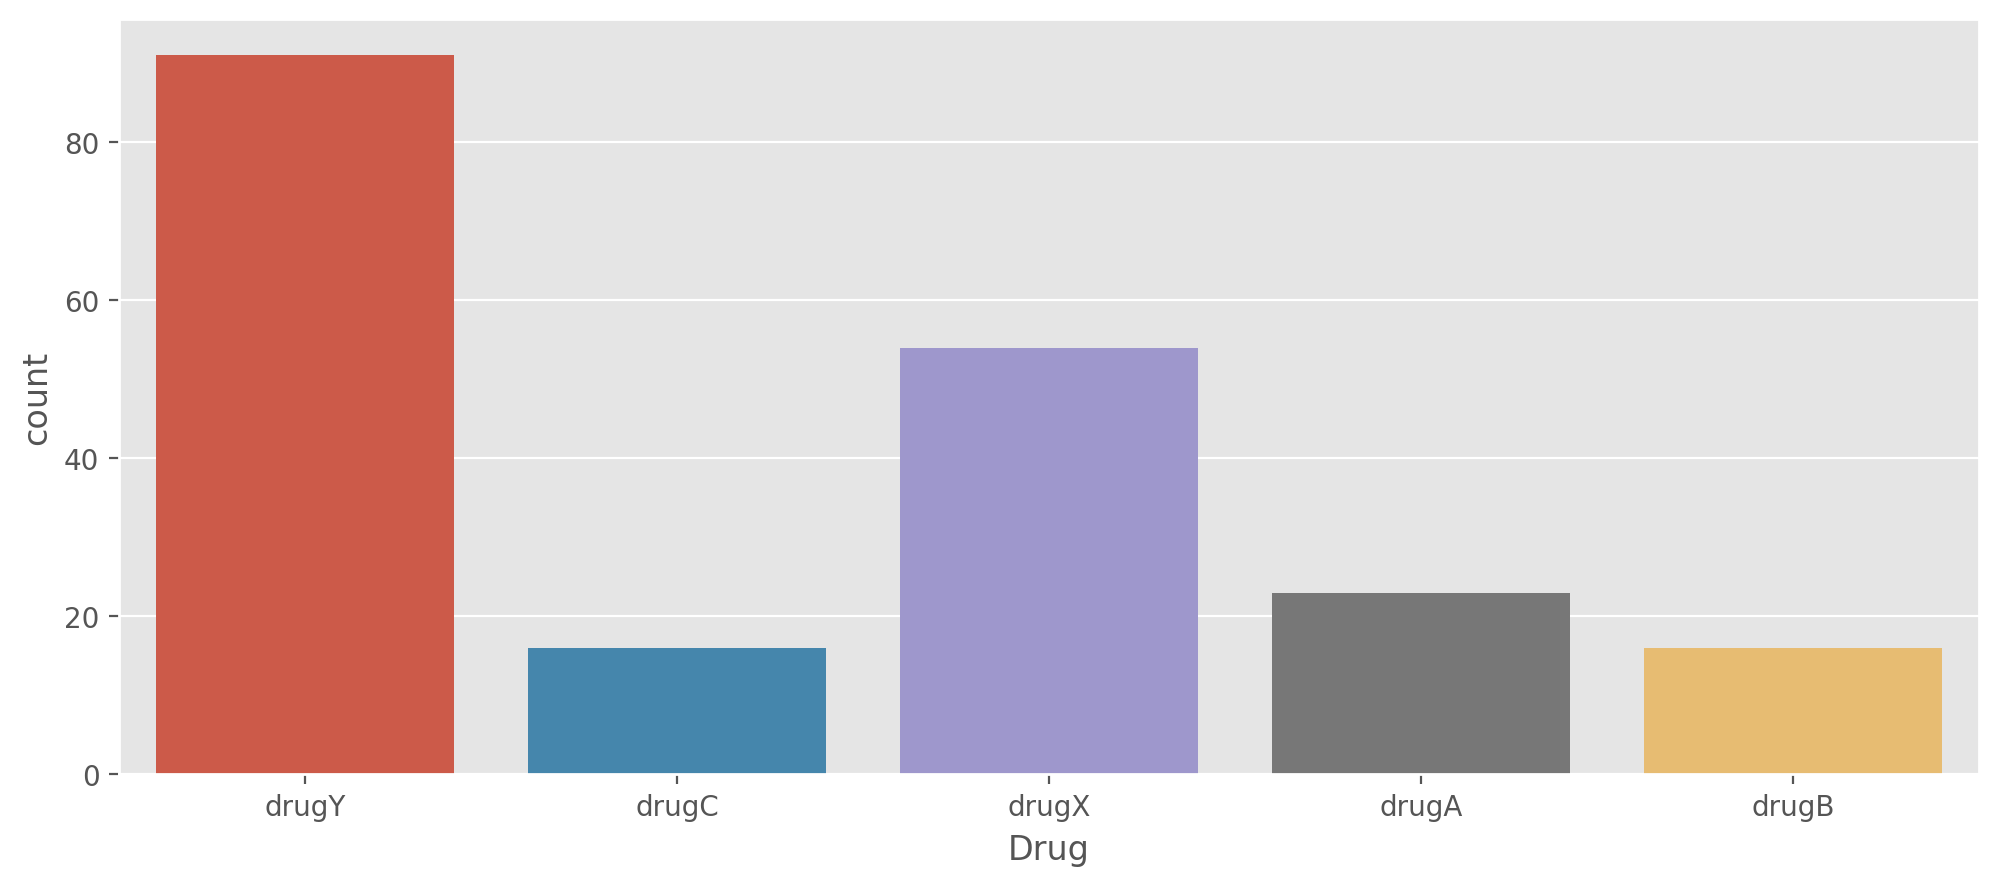

In [8]:
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot(data.Drug)

<AxesSubplot:ylabel='Age'>

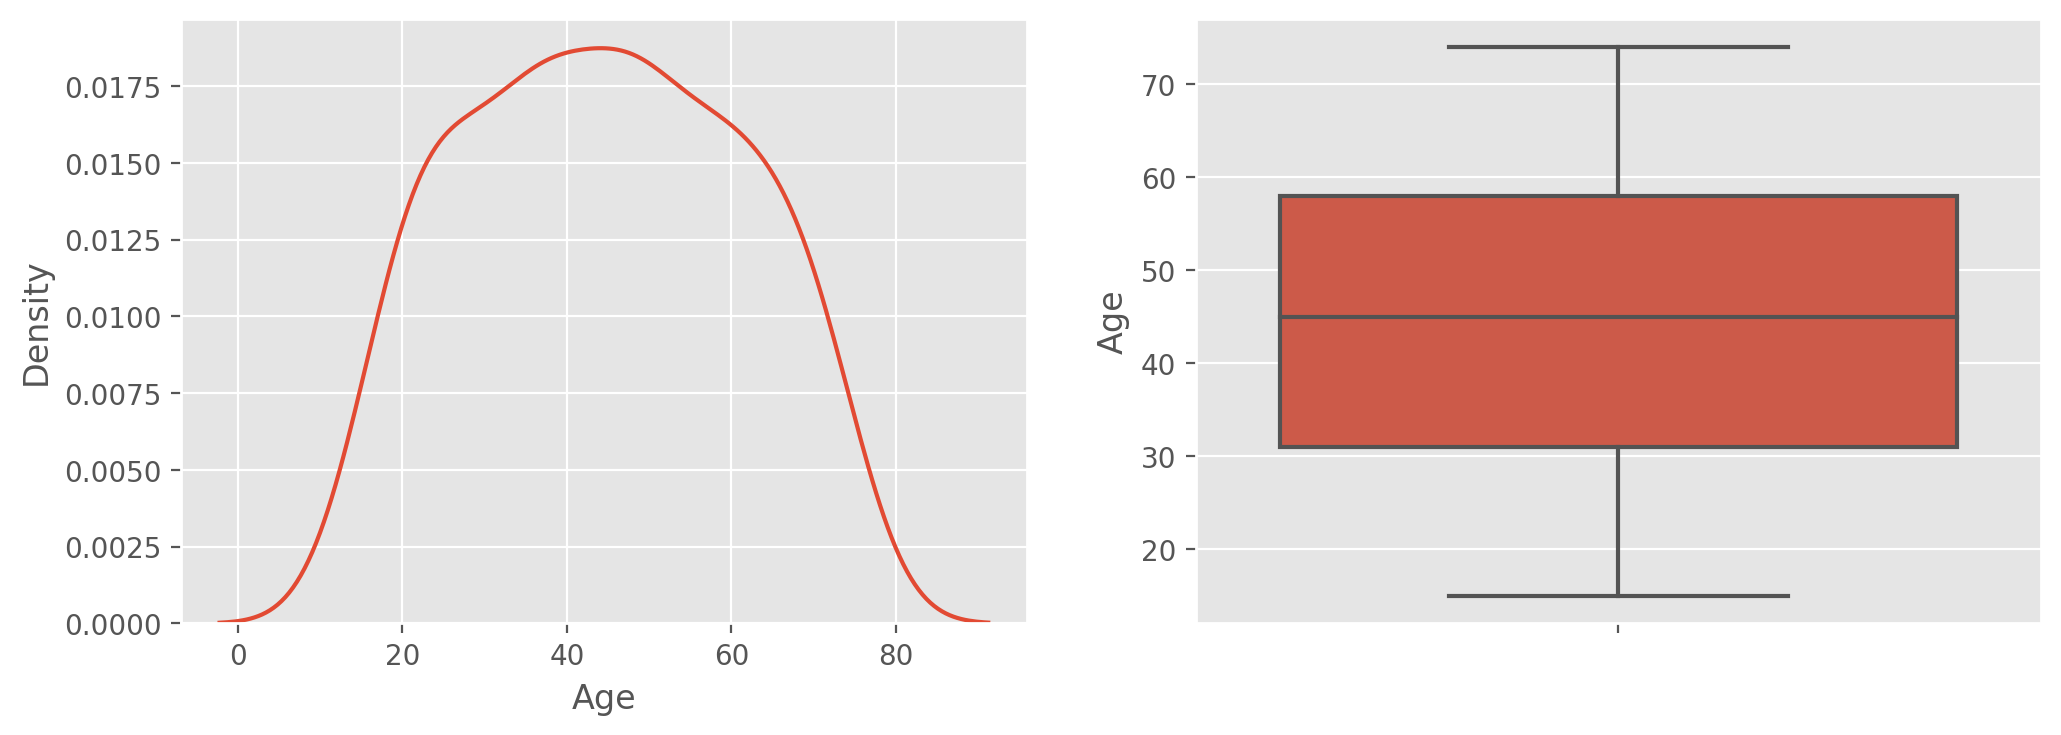

In [9]:
plt.figure(figsize = (12,4), dpi = 200)

plt.subplot(1,2,1)
sns.distplot(data.Age, hist = False)
plt.subplot(1,2,2)
sns.boxplot(y = data.Age)

<AxesSubplot:ylabel='Na_to_K'>

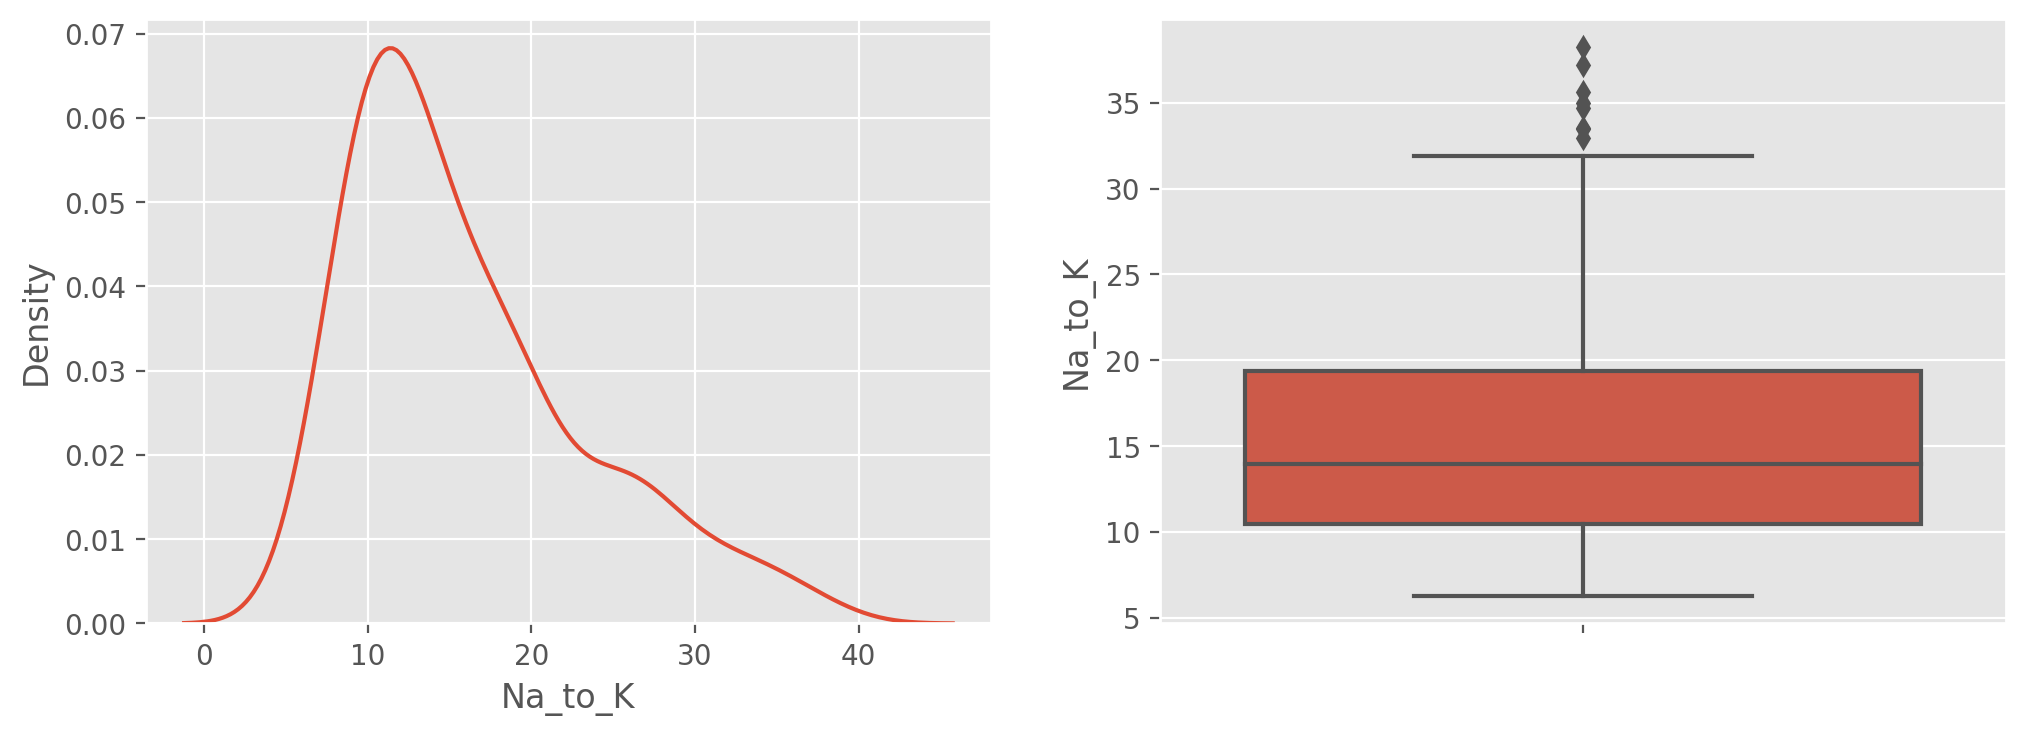

In [13]:
plt.figure(figsize = (12,4), dpi = 200)

plt.subplot(1,2,1)
sns.distplot(data.Na_to_K, hist = False)
plt.subplot(1,2,2)
sns.boxplot(y = data.Na_to_K)

<AxesSubplot:xlabel='Drug', ylabel='count'>

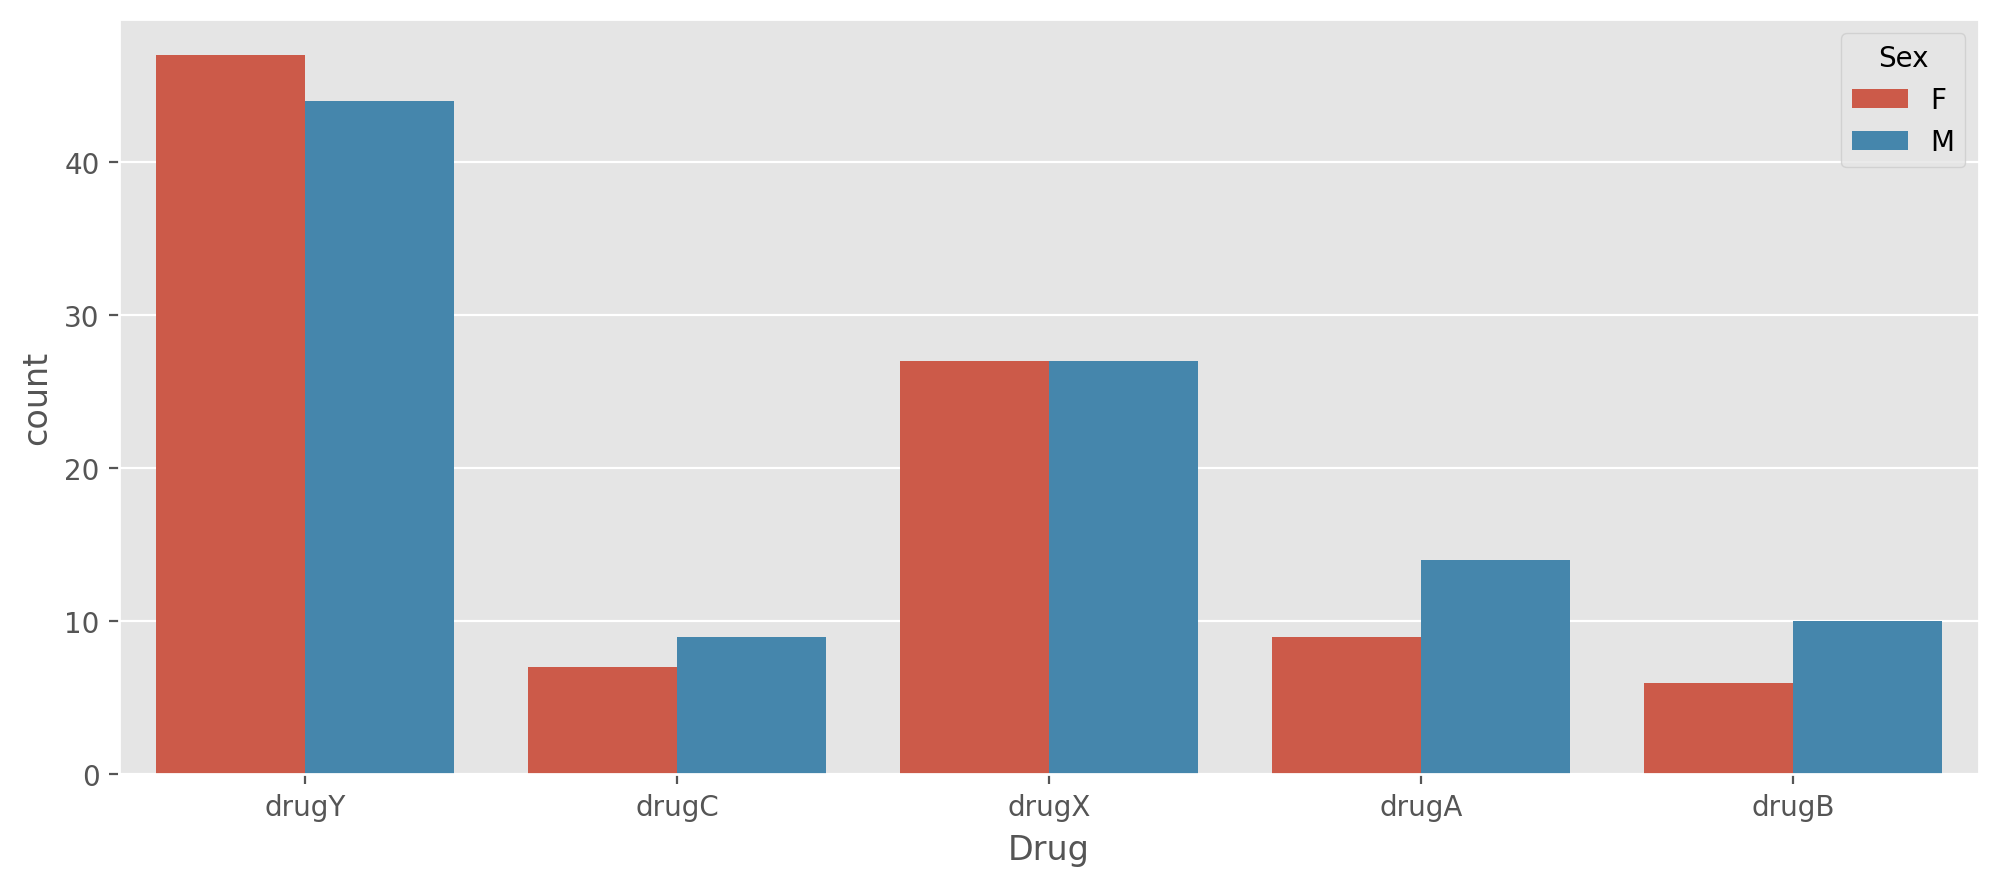

In [15]:
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot(data.Drug, hue = data.Sex)

<AxesSubplot:xlabel='Drug', ylabel='count'>

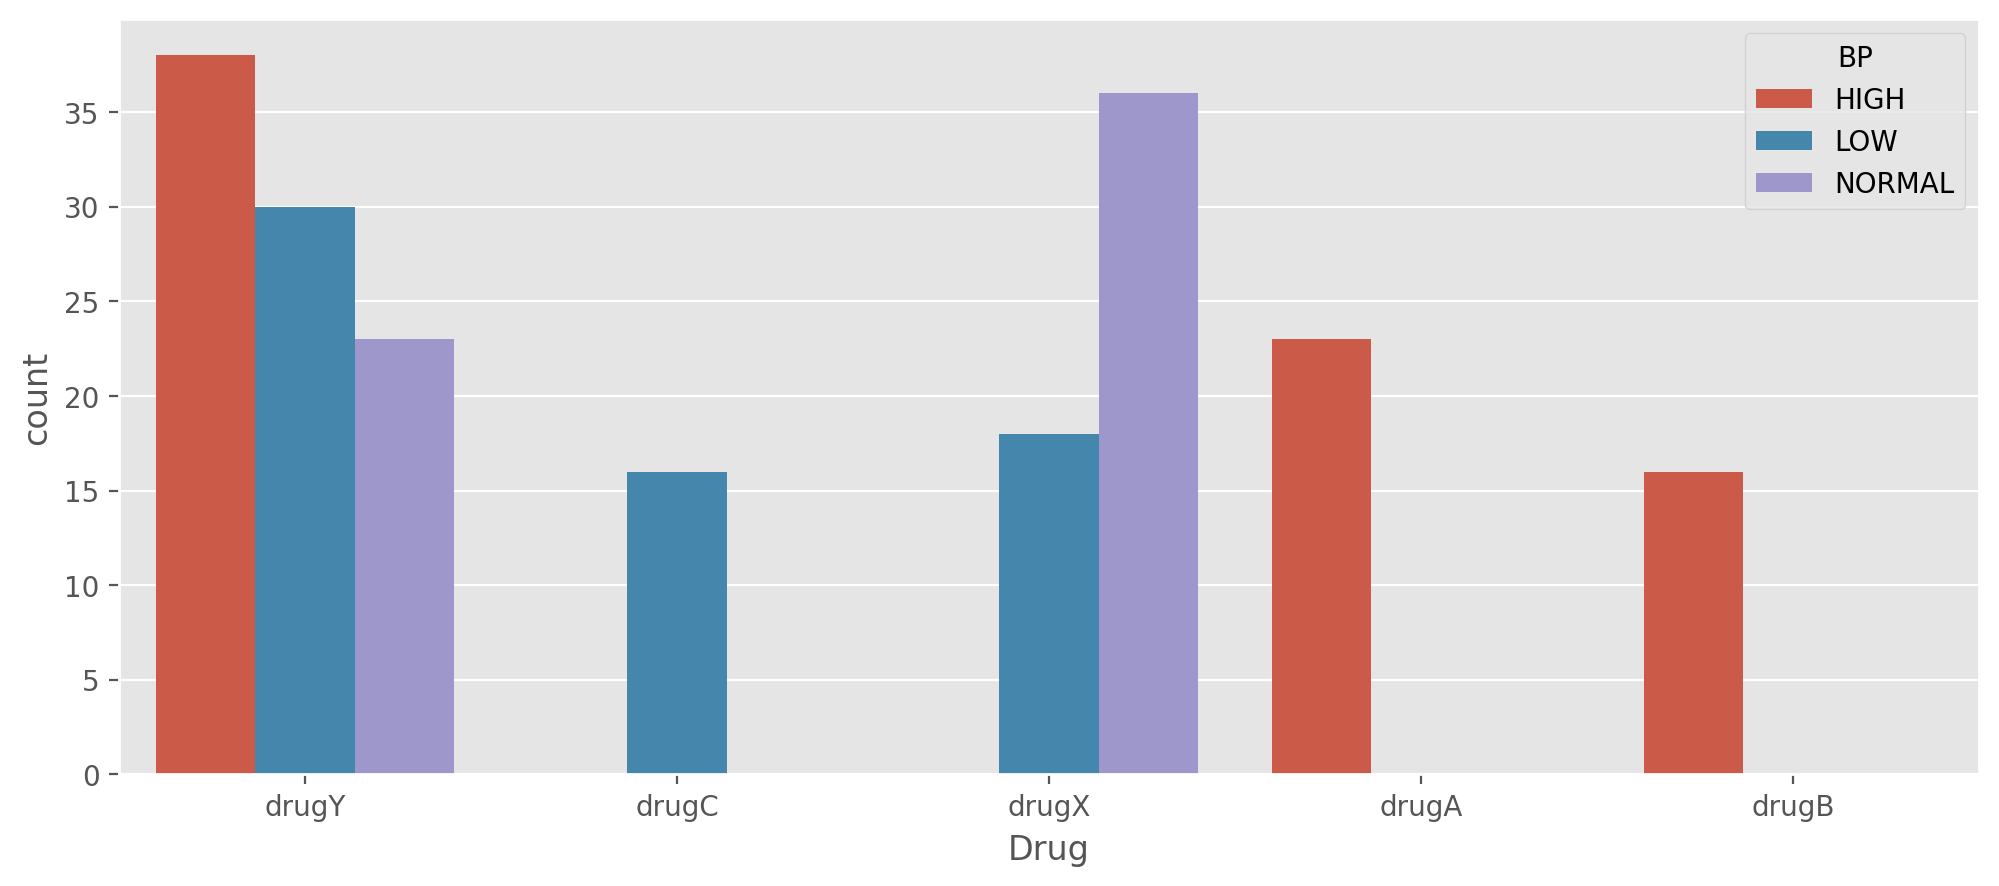

In [16]:
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot(data.Drug, hue = data.BP)

<AxesSubplot:xlabel='BP', ylabel='count'>

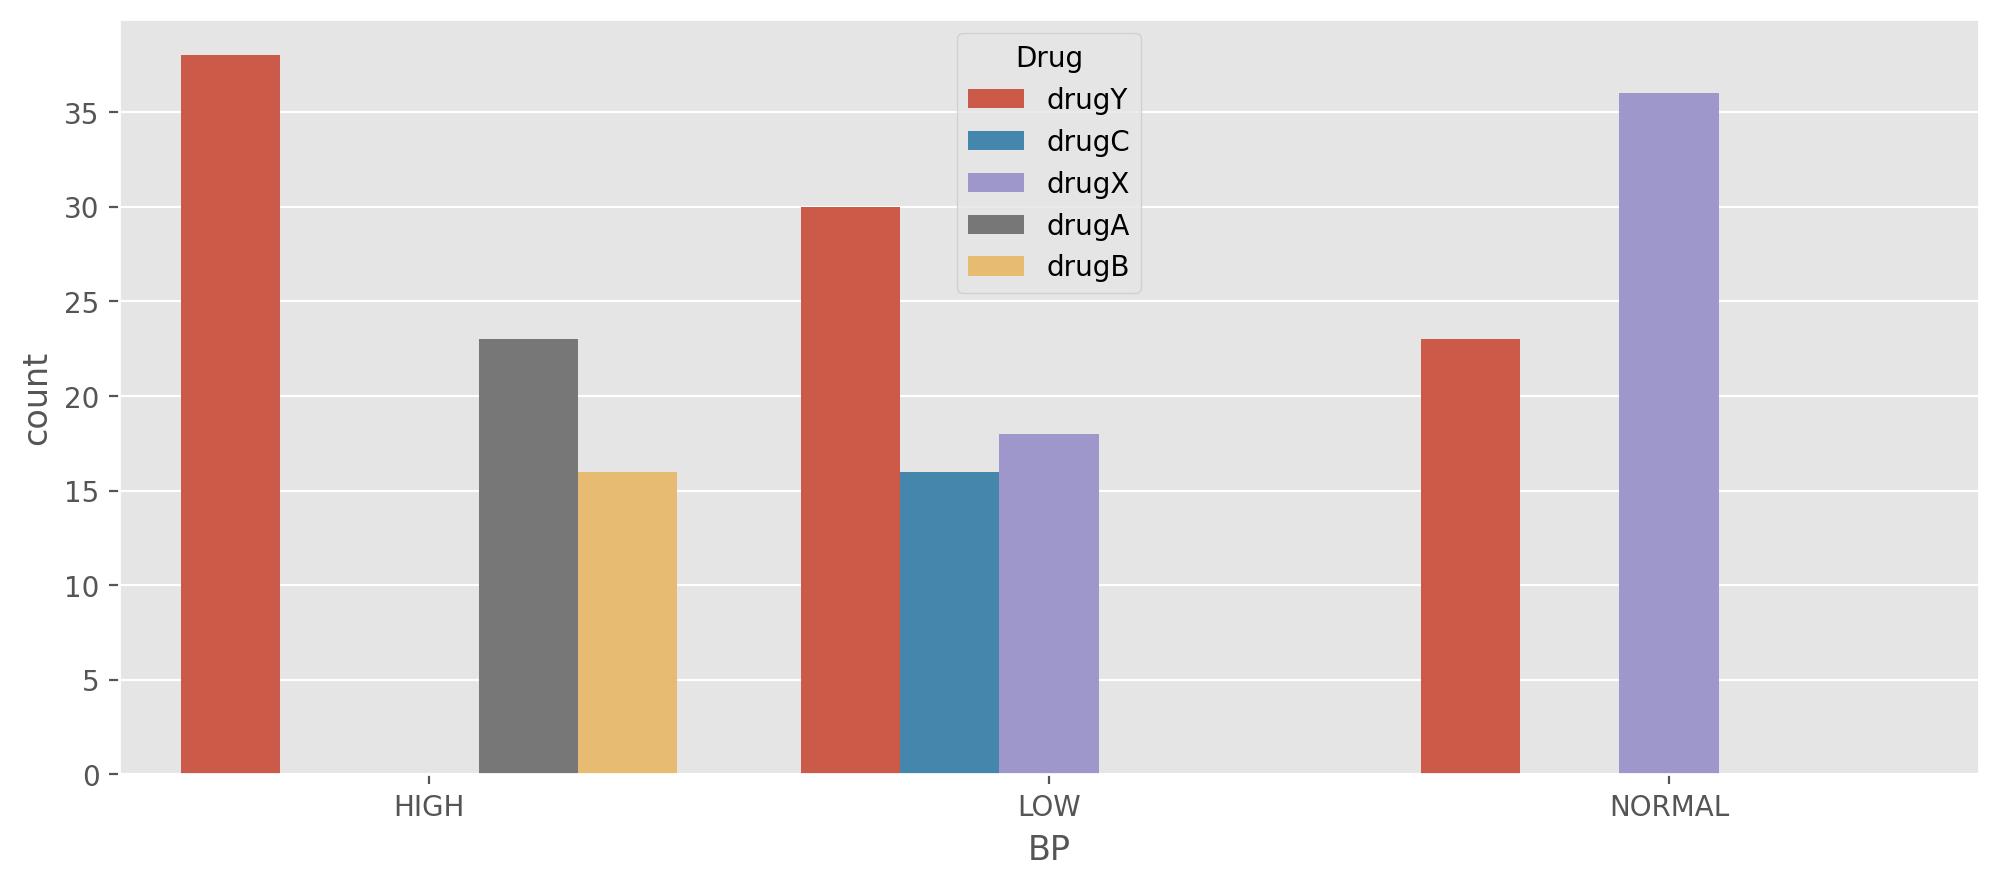

In [17]:
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot(data.BP, hue = data.Drug)

<AxesSubplot:xlabel='Drug', ylabel='count'>

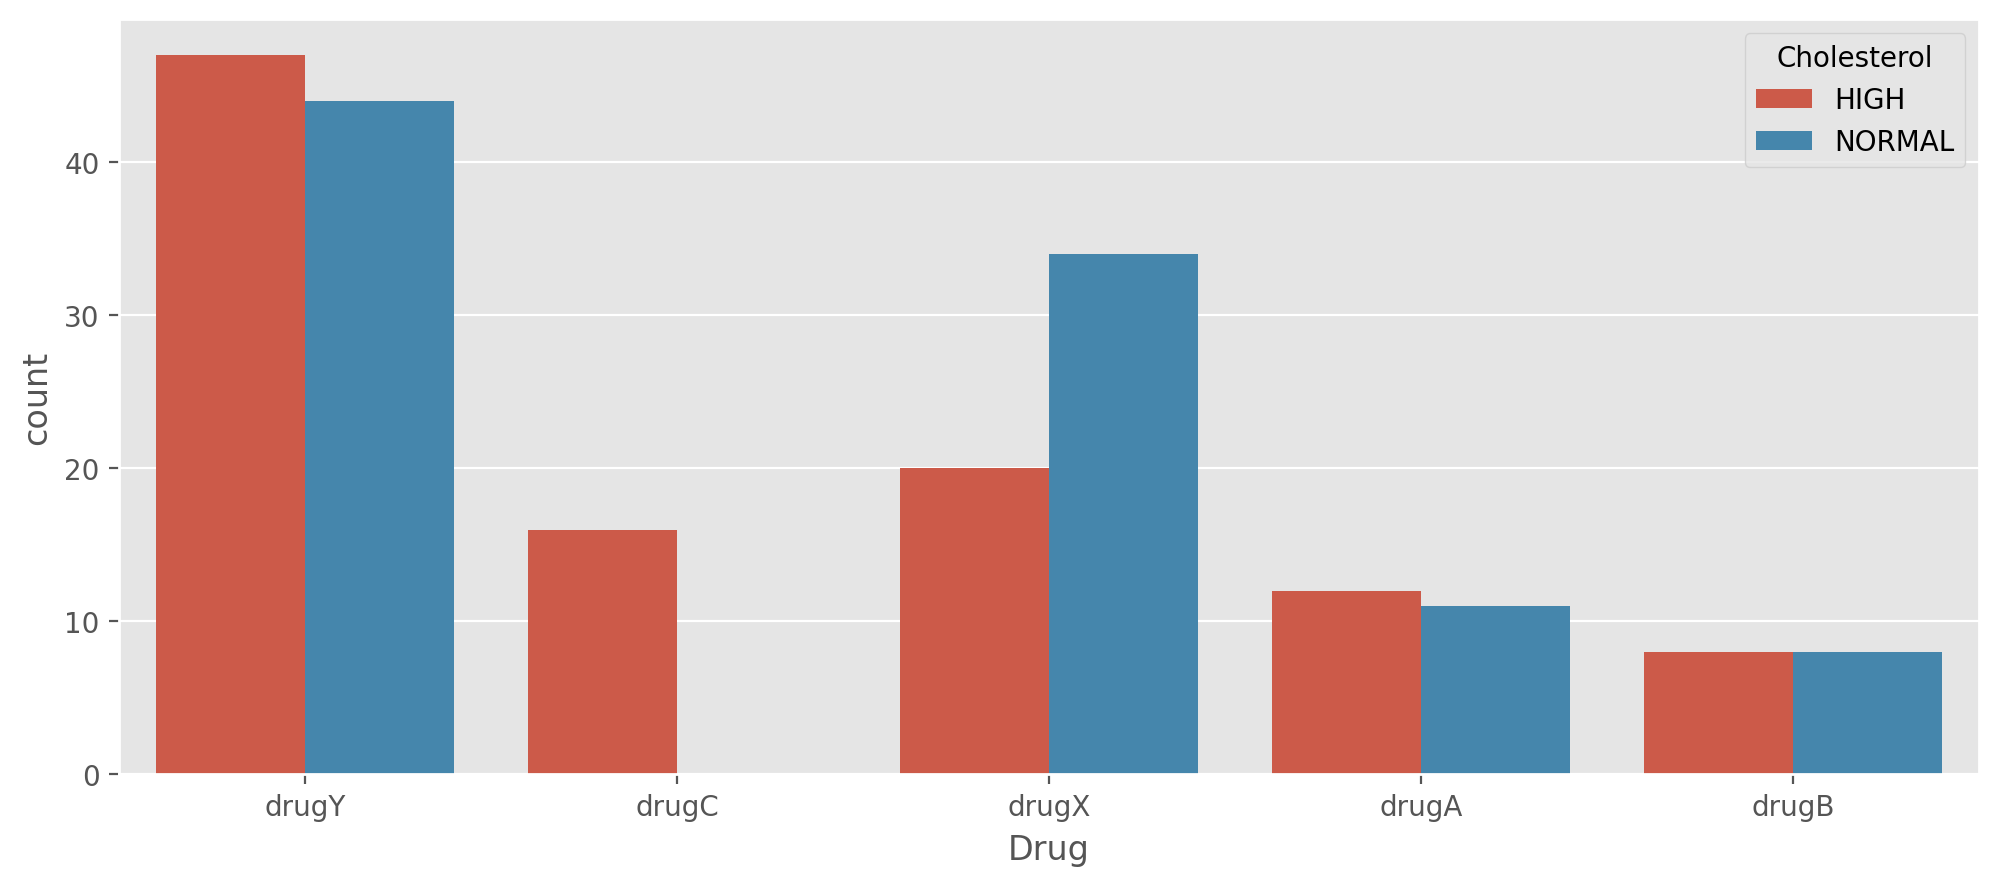

In [18]:
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot(data.Drug, hue = data.Cholesterol)

<AxesSubplot:xlabel='Cholesterol', ylabel='count'>

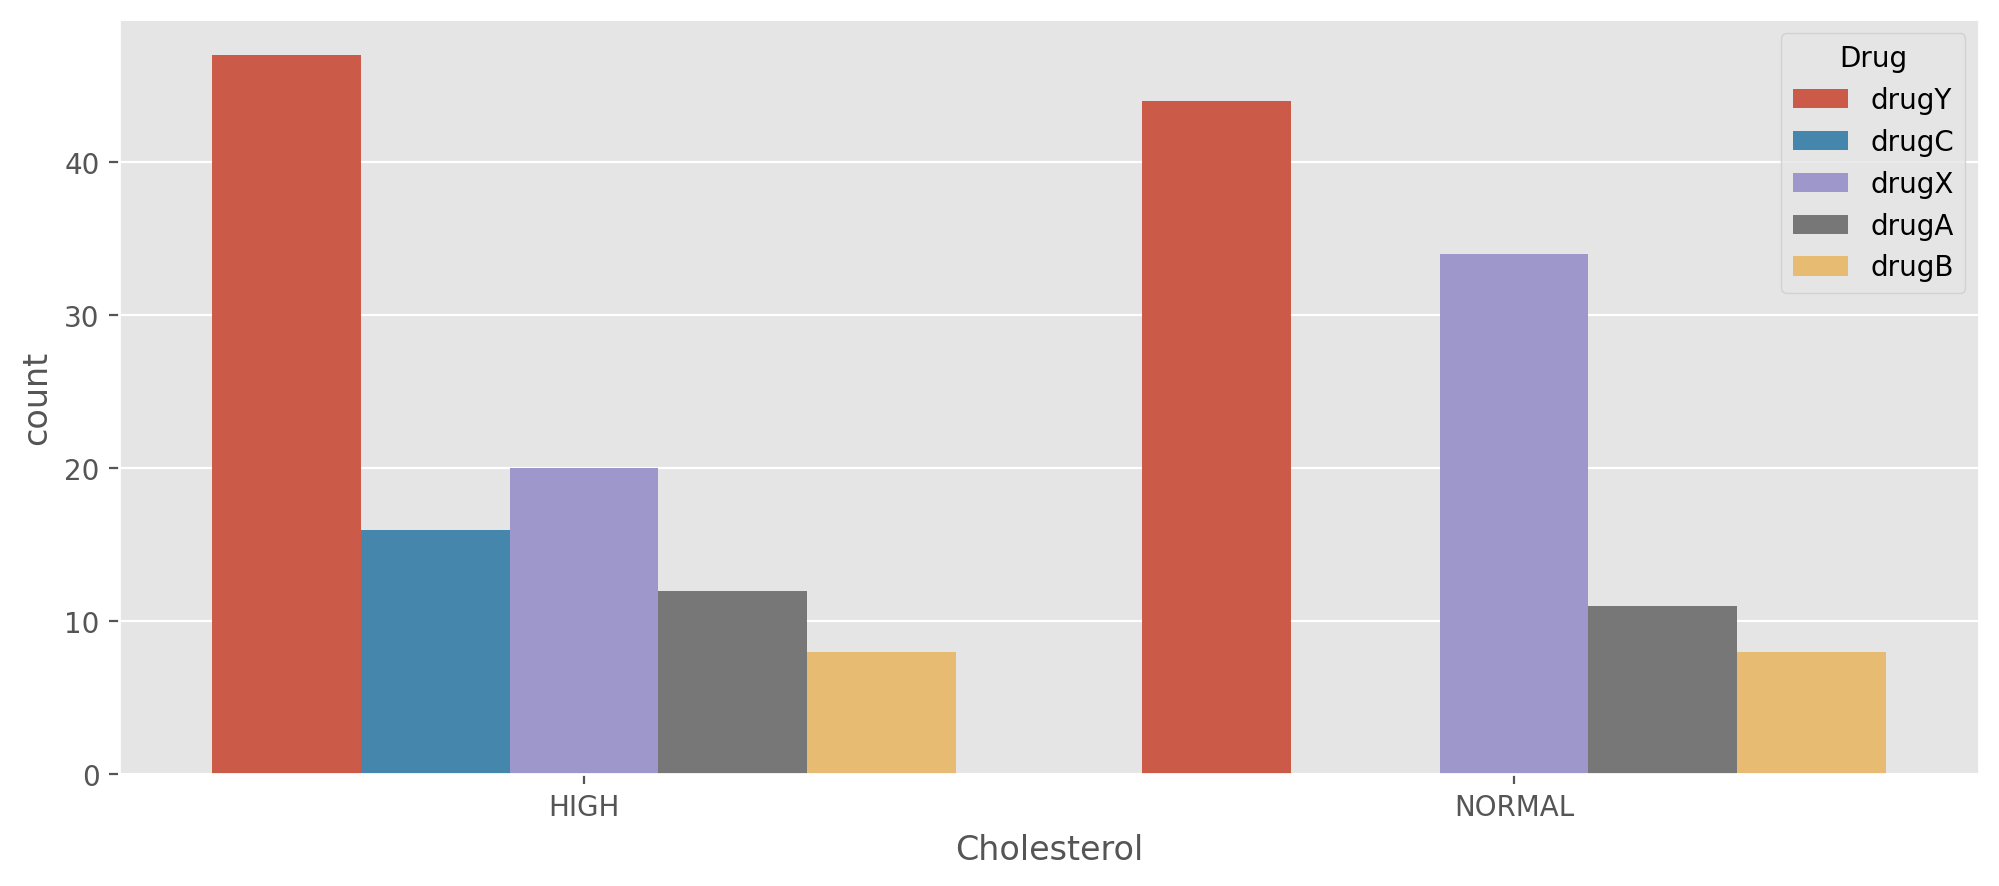

In [20]:
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot(data.Cholesterol, hue = data.Drug)

<AxesSubplot:xlabel='Drug', ylabel='Age'>

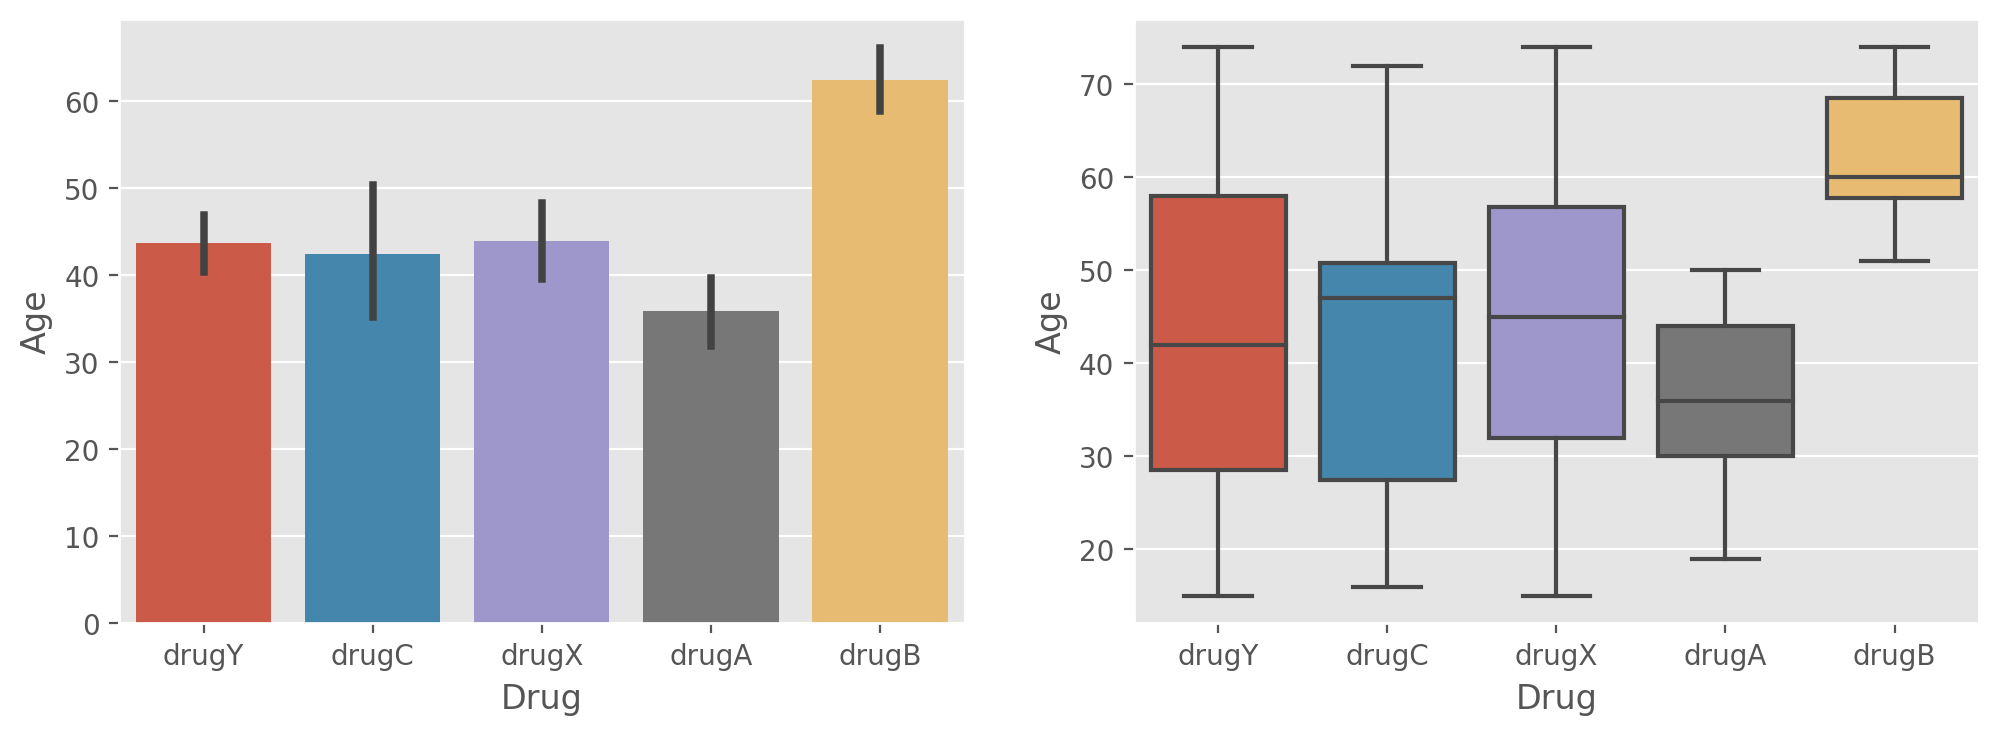

In [21]:
plt.figure(figsize = (12,4), dpi = 200)

plt.subplot(1,2,1)
sns.barplot(data.Drug, data.Age)
plt.subplot(1,2,2)
sns.boxplot(data.Drug, data.Age)

<AxesSubplot:xlabel='Drug', ylabel='Na_to_K'>

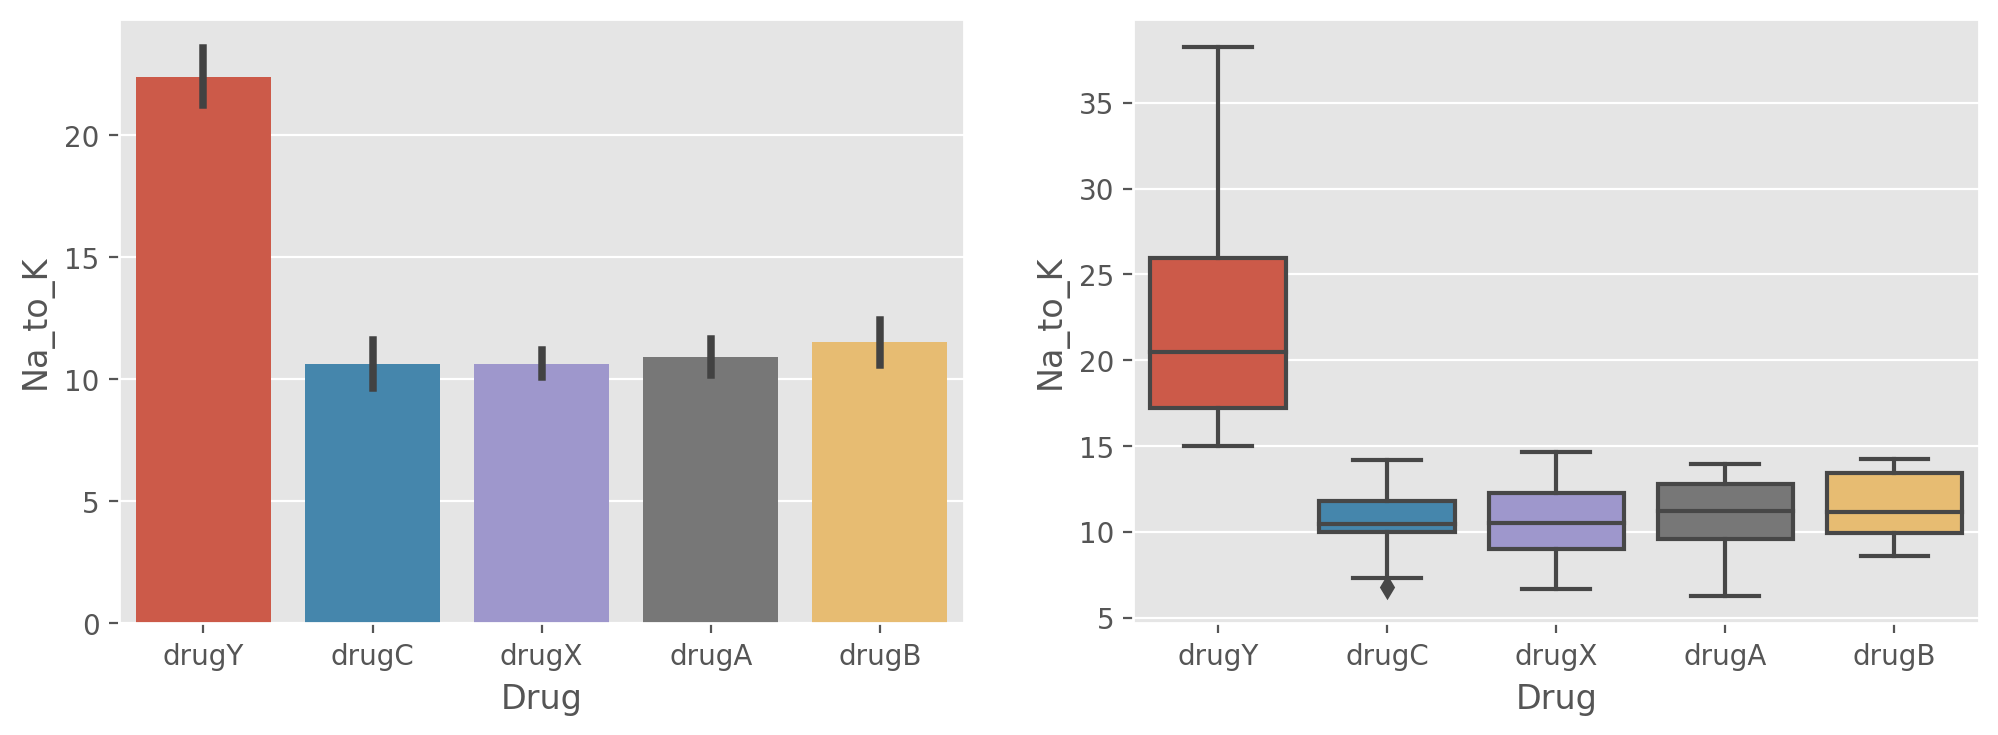

In [22]:
plt.figure(figsize = (12,4), dpi = 200)

plt.subplot(1,2,1)
sns.barplot(data.Drug, data.Na_to_K)
plt.subplot(1,2,2)
sns.boxplot(data.Drug, data.Na_to_K)

In [10]:
data.BP = data.BP.map({'LOW' : 0, 'NORMAL' : 1, 'HIGH' : 2})
data.Cholesterol = data.Cholesterol.map({'NORMAL' : 0, 'HIGH' : 1})

data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,2,1,25.355,drugY
1,47,M,0,1,13.093,drugC
2,47,M,0,1,10.114,drugC
3,28,F,1,1,7.798,drugX
4,61,F,0,1,18.043,drugY


In [11]:
cols = ['Age', 'Na_to_K', 'BP', 'Cholesterol']
X = data[cols].values
Y = data[['Drug']].values

In [12]:
X[:10]

array([[23.   , 25.355,  2.   ,  1.   ],
       [47.   , 13.093,  0.   ,  1.   ],
       [47.   , 10.114,  0.   ,  1.   ],
       [28.   ,  7.798,  1.   ,  1.   ],
       [61.   , 18.043,  0.   ,  1.   ],
       [22.   ,  8.607,  1.   ,  1.   ],
       [49.   , 16.275,  1.   ,  1.   ],
       [41.   , 11.037,  0.   ,  1.   ],
       [60.   , 15.171,  1.   ,  1.   ],
       [43.   , 19.368,  0.   ,  0.   ]])

In [13]:
Y[:10]

array([['drugY'],
       ['drugC'],
       ['drugC'],
       ['drugX'],
       ['drugY'],
       ['drugX'],
       ['drugY'],
       ['drugC'],
       ['drugY'],
       ['drugY']], dtype=object)

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

In [35]:
print('Training Data Shape   : ', x_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', x_test.shape)
print('Testing Labels Shape  : ', y_test.shape)

Training Data Shape   :  (160, 4)
Training Labels Shape :  (160, 1)
Testing Data Shape    :  (40, 4)
Testing Labels Shape  :  (40, 1)


In [36]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [37]:
pred_train = classifier.predict(x_train)
pred_test  = classifier.predict(x_test)

In [38]:
from sklearn.metrics import accuracy_score
print('Training Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing Accuracy  : ', accuracy_score(y_test, pred_test))

Training Accuracy :  0.775
Testing Accuracy  :  0.75


# Effect of value of K
- If value of k (Number of neighbors) is very low then we have a complex and inappropriate model which leads to overfitting
- If value of k is very large then we have a over generalized model which leads to underfitting

In [39]:
# Very low value of k
classifier = KNeighborsClassifier(n_neighbors = 1)
classifier.fit(x_train, y_train)

pred_train = classifier.predict(x_train)
pred_test  = classifier.predict(x_test)

print('Training Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing Accuracy  : ', accuracy_score(y_test, pred_test))

Training Accuracy :  1.0
Testing Accuracy  :  0.775


In [40]:
# Very high value of k
classifier = KNeighborsClassifier(n_neighbors = 20)
classifier.fit(x_train, y_train)

pred_train = classifier.predict(x_train)
pred_test  = classifier.predict(x_test)

print('Training Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing Accuracy  : ', accuracy_score(y_test, pred_test))

Training Accuracy :  0.69375
Testing Accuracy  :  0.7


# Selecting best value of K

In [41]:
acc_train = []
acc_test  = []

for i in range(1,21):
    classifier = KNeighborsClassifier(n_neighbors = i)
    classifier.fit(x_train, y_train)
    
    pred_train = classifier.predict(x_train)
    pred_test  = classifier.predict(x_test)
    
    acc_train.append(accuracy_score(y_train, pred_train))
    acc_test.append(accuracy_score(y_test, pred_test))

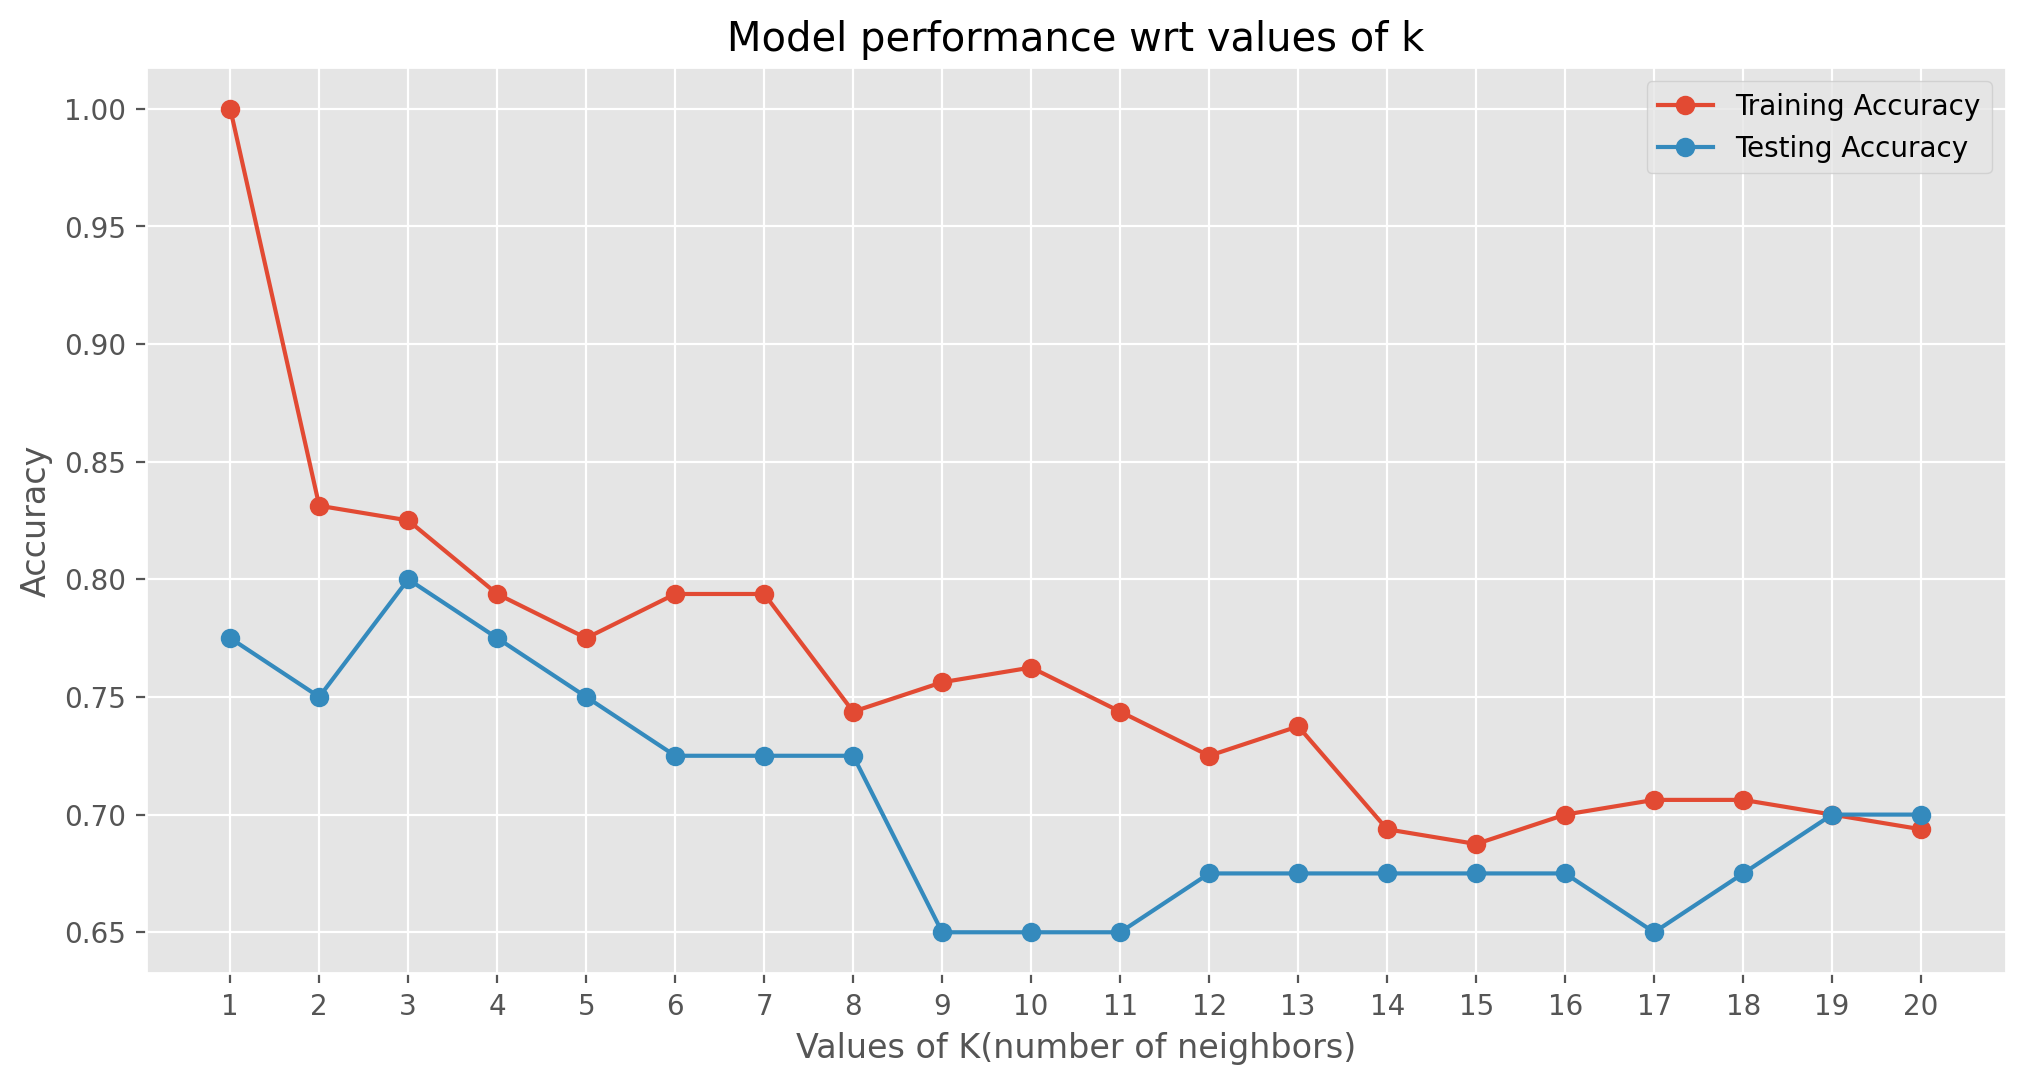

In [49]:
plt.figure(figsize = (12,6), dpi = 200)
plt.plot(range(1,21), acc_train, '-o', label = 'Training Accuracy')
plt.plot(range(1,21), acc_test, '-o', label = 'Testing Accuracy')

plt.title('Model performance wrt values of k')
plt.xlabel('Values of K(number of neighbors)')
plt.ylabel('Accuracy')
plt.xticks(range(1,21))
plt.legend()

In [50]:
classifier_best = KNeighborsClassifier(n_neighbors = 3)
classifier_best.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)